In [1]:
# This would be the main notebook that would be run to execute the entire project
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



## Linear Regression:

In [2]:
from sklearn.linear_model import LinearRegression

# Read the CSV file
data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')

# laod test data
test_data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi_test.csv')


# variables : time_slot,weekday,order_gap,supply,demand,temperature,pm25,region_id,poi_ids
# dependent variable: order_gap, supply, demand
# independent variables: time_slot,weekday,temperature,pm25,region_id,poi_ids

# Split the data into independent and dependent variables
X = data[['time_slot','weekday','temperature','pm25','poi_ids']]
y = data['supply']


# Create a Linear Regression model and fit the data
model = LinearRegression()
model.fit(X, y)

# Predict the values for the test set
y_pred = model.predict(test_data[['time_slot','weekday','temperature','pm25','poi_ids']])


# Compute the R-squared score for the Linear Regression model
accuracy = r2_score(test_data['supply'], y_pred)

# Print the accuracy
print("Accuracy of model:", accuracy)

# Calculate the mean absolute error
mae = np.mean(np.abs(test_data['supply'] - y_pred))

# Print the result
print('Mean Absolute Error:', mae)


Accuracy of model: -0.20664211309379898
Mean Absolute Error: 49.6334078571195


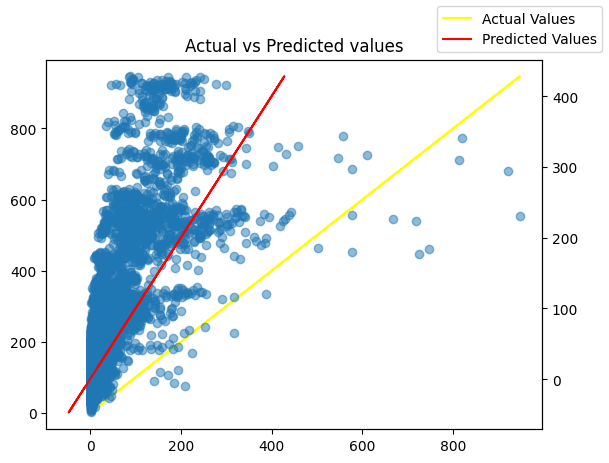

In [3]:
# Plot the predicted values against the actual values in line plot
fig, ax1 = plt.subplots()

ax1.plot(test_data['supply'], test_data['supply'], color='yellow', label='Actual Values')

ax2 = ax1.twinx()

ax2.plot(y_pred, y_pred, color='red', label='Predicted Values')

plt.title("Actual vs Predicted values")
plt.scatter(test_data['supply'], y_pred, alpha=0.5)
fig.legend()
plt.show()


## MeanAbsoluteError

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Read the CSV file
data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')

# Extract the relevant columns
data = data[['region_id', 'time_slot', 'order_gap']]

# Group by region and time slot, and calculate the mean actual and predicted gaps
actual_predicted_gaps = data.groupby(['region_id', 'time_slot']).agg({'order_gap': ['mean']})
actual_predicted_gaps.columns = ['actual_gap']

# Train a Linear Regression model on the data
lr = LinearRegression()

X = data.groupby(['region_id', 'time_slot']).mean().reset_index().drop(['region_id', 'time_slot'], axis=1)
y = data.groupby(['region_id', 'time_slot']).agg({'order_gap': ['mean']})
y.columns = ['order_gap']
lr.fit(X, y)

# Predict the order gap for each region and time slot
X_pred = data.groupby(['region_id', 'time_slot']).mean().reset_index().drop(['region_id', 'time_slot'], axis=1)
y_pred = lr.predict(X_pred)
actual_predicted_gaps['predicted_gap'] = y_pred

# Calculate the mean absolute error
mae = np.mean(np.abs(actual_predicted_gaps['actual_gap'] - actual_predicted_gaps['predicted_gap']))

# Print the result
print('Mean Absolute Error:', mae)


Mean Absolute Error: 4.593427316281454e-14


## Decision Tree Regression:

In [5]:
from sklearn.tree import DecisionTreeRegressor

# Read the CSV file
data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')

# laod test data
test_data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi_test.csv')


# variables : time_slot,weekday,order_gap,supply,demand,temperature,pm25,region_id,poi_ids
# dependent variable: order_gap, supply, demand
# independent variables: time_slot,weekday,temperature,pm25,region_id,poi_ids

# Split the data into independent and dependent variables
X = data[['time_slot','weekday','temperature','pm25','poi_ids']]
y = data['supply']

# Create a Decision Tree Regression model and fit the data
model = DecisionTreeRegressor()
model.fit(X, y)

# Predict the values for the test set
y_pred = model.predict(test_data[['time_slot','weekday','temperature','pm25','poi_ids']])


# Compute the R-squared score for the Linear Regression model
accuracy = r2_score(test_data['supply'], y_pred)

# Print the accuracy
print("Accuracy of Decision Tree Regression model:", accuracy)

# Calculate the mean absolute error
mae = np.mean(np.abs(test_data['supply'] - y_pred))

# Print the result
print('Mean Absolute Error:', mae)

Accuracy of Decision Tree Regression model: -1.292300954729594
Mean Absolute Error: 52.96825396825397


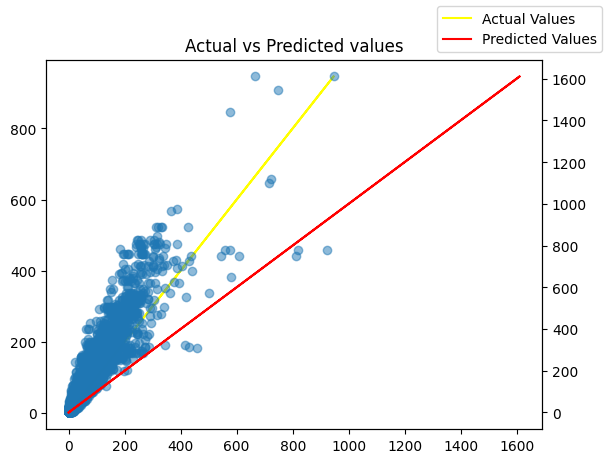

In [6]:
# Plot the predicted values against the actual values in line plot
fig, ax1 = plt.subplots()

ax1.plot(test_data['supply'], test_data['supply'], color='yellow', label='Actual Values')

ax2 = ax1.twinx()

ax2.plot(y_pred, y_pred, color='red', label='Predicted Values')

plt.title("Actual vs Predicted values")
plt.scatter(test_data['supply'], y_pred, alpha=0.5)
fig.legend()
plt.show()


## Random Forest Regression:

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Read the CSV file
data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')

# laod test data
test_data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi_test.csv')


# variables : time_slot,weekday,order_gap,supply,demand,temperature,pm25,region_id,poi_ids
# dependent variable: order_gap, supply, demand
# independent variables: time_slot,weekday,temperature,pm25,region_id,poi_ids

# Split the data into independent and dependent variables
X = data[['time_slot','weekday','temperature','pm25','poi_ids']]
y = data['supply']

# Create a Random Forest model and fit the data
model = RandomForestRegressor()
model.fit(X, y)

# Predict the values for the test set
y_pred = model.predict(test_data[['time_slot','weekday','temperature','pm25','poi_ids']])

# print(y_pred)
# print(test_data['supply'])

# Compute the R-squared score for the Linear Regression model
accuracy = r2_score(test_data['supply'], y_pred)

# Print the accuracy
print("Accuracy of Random Forest Regression model:", accuracy)

# Calculate the mean absolute error
mae = np.mean(np.abs(test_data['supply'] - y_pred))

# Print the result
print('Mean Absolute Error:', mae)

Accuracy of Random Forest Regression model: -1.2905322541860431
Mean Absolute Error: 53.677082125603874


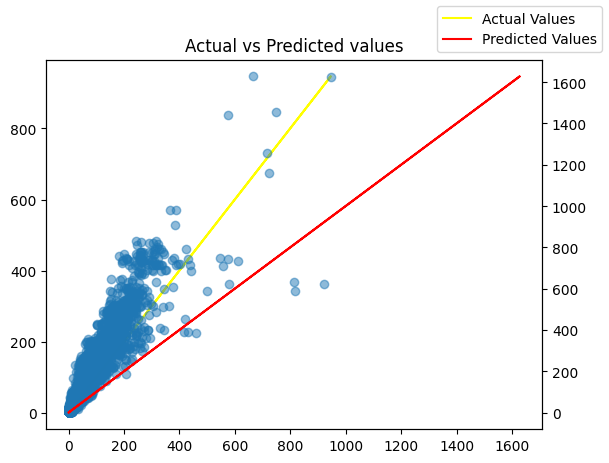

In [8]:
# Plot the predicted values against the actual values in line plot
fig, ax1 = plt.subplots()

ax1.plot(test_data['supply'], test_data['supply'], color='yellow', label='Actual Values')

ax2 = ax1.twinx()

ax2.plot(y_pred, y_pred, color='red', label='Predicted Values')

plt.title("Actual vs Predicted values")
plt.scatter(test_data['supply'], y_pred, alpha=0.5)
fig.legend()
plt.show()


## XGBoost Regression:

In [9]:
# !pip install xgboost

In [10]:
from xgboost import XGBRegressor

# Read the CSV file
data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')

# laod test data
test_data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi_test.csv')


# variables : time_slot,weekday,order_gap,supply,demand,temperature,pm25,region_id,poi_ids
# dependent variable: order_gap, supply, demand
# independent variables: time_slot,weekday,temperature,pm25,region_id,poi_ids

# Split the data into independent and dependent variables
X = data[['time_slot','weekday','temperature','pm25','poi_ids']]
y = data['supply']


# Create a Random Forest model and fit the data
model = XGBRegressor()
model.fit(X, y)

# Predict the values for the test set
y_pred = model.predict(test_data[['time_slot','weekday','temperature','pm25','poi_ids']])

# print(y_pred)
# print(test_data['supply'])

# Compute the R-squared score for the Linear Regression model
accuracy = r2_score(test_data['supply'], y_pred)

print("Accuracy of Random Forest Regression model:", accuracy)

# Calculate the mean absolute error
mae = np.mean(np.abs(test_data['supply'] - y_pred))

# Print the result
print('Mean Absolute Error:', mae)

Accuracy of Random Forest Regression model: -1.1861380005318822
Mean Absolute Error: 51.167999069230454


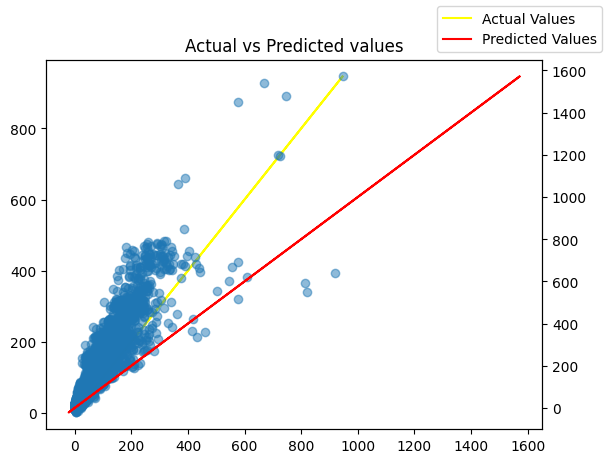

In [11]:
# Plot the predicted values against the actual values in line plot
fig, ax1 = plt.subplots()

ax1.plot(test_data['supply'], test_data['supply'], color='yellow', label='Actual Values')

ax2 = ax1.twinx()

ax2.plot(y_pred, y_pred, color='red', label='Predicted Values')

plt.title("Actual vs Predicted values")
plt.scatter(test_data['supply'], y_pred, alpha=0.5)
fig.legend()
plt.show()


In [12]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# import pandas as pd
# import numpy as np

# # Read the CSV file
# data = pd.read_csv('../dataset/processedData/orders_weather_cluster_map_poi.csv')

# # variables : time_slot,weekday,order_gap,temperature,pm25,region_id,poi_ids
# # dependent variable: order_gap
# # independent variables: time_slot,weekday,temperature,pm25,region_id,poi_ids


# # Split the data into independent and dependent variables
# X = data[['time_slot','weekday','temperature','pm25','region_id','poi_ids']]
# y = data['order_gap']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Create a Linear Regression model and fit the data
# lr = LinearRegression()
# lr.fit(X_train, y_train)

# # Predict the values for the test set
# y_pred = lr.predict(X_test)

# # Calculate the mean absolute error
# actual_gaps = y_test
# predicted_gaps = y_pred
# num_regions = len(data['region_id'].unique())
# num_time_slots = len(data['time_slot'].unique())

# total_mae = 0

# for region in range(num_regions):
#     for time_slot in range(num_time_slots):
#         actual_gap = actual_gaps[(data['region_id'] == region) & (data['time_slot'] == time_slot)]
#         predicted_gap = predicted_gaps[(data['region_id'] == region) & (data['time_slot'] == time_slot)]
#         abs_diff = abs(actual_gap - predicted_gap)
#         total_mae += abs_diff

# mae = total_mae / (num_regions * num_time_slots)

# print('Mean Absolute Error:', mae)
